In [1]:
from random import random, sample

In [2]:
sample_rate = .9
sr_str = str(int(sample_rate*100))

In [3]:
# f = open('data/string_nonzero_experiments.csv')
# num_links=0
# for line in f:
#     num_links+=1
# print(num_links)

# f = open('data/string_nonzero_experiments.csv')
# proteins = set()
# pairs = set()
# uniq_pair_file = open('data/unique_string_nonzero_experiments.csv','w')
# uniq_protein_file = open('data/unique_experiment_protein_ids.csv','w')

# next(f)
# for line in f:
#     source, target, score = line.strip().split(',')
    
#     if source not in proteins:
#         uniq_protein_file.write(source + '\n')
#     proteins.add(source)
    
#     if target not in proteins:
#         uniq_protein_file.write(target + '\n')
#     proteins.add(target)
    
#     if (source,target) not in pairs:
#         uniq_pair_file.write(line)
#     pairs.add((source,target))

# print(len(proteins))
# print(len(pairs))
# uniq_pair_file.close()
# uniq_protein_file.close()

# f = open('data/string_nonzero_experiments.csv')

# train_file = open('data/protein_pairs/train_split_' + sr_str + '.dat','w')
# test_file = open('data/protein_pairs/test_split_' + sr_str + '.dat','w')
# validation_file = open('data/protein_pairs/validation_split_' + sr_str + '.dat','w')
# train_neg_file = open('data/protein_pairs/train_neg_split_' + sr_str + '.dat','w')
# test_neg_file = open('data/protein_pairs/test_neg_split_' + sr_str + '.dat','w')
# validation_neg_file = open('data/protein_pairs/validation_neg_split_' + sr_str + '.dat','w')

# header = next(f)
# train_file.write(header)
# test_file.write(header)
# validation_file.write(header)

# for line in f:
#     r = random()
#     negative = tuple(sample(proteins, 2))
#     while negative in pairs:
#         negative = tuple(sample(proteins, 2))
#     # Training set size determined by sampling rate
#     if r >= sample_rate:
#         train_file.write(line)
#         train_neg_file.write(','.join(negative) + ',0\n')
#     else:
#         # Split non-training data into test/validation equally
#         r = random()
#         if r >= .5:
#             test_file.write(line)
#             test_neg_file.write(','.join(negative) + ',0\n')
#         else:
#             validation_file.write(line)
#             validation_neg_file.write(','.join(negative) + ',0\n')


# train_file.close()
# test_file.close()
# validation_file.close()
# train_neg_file.close()
# test_neg_file.close()
# validation_neg_file.close()
# f.close()

In [4]:
import gensim
from node2vec import Node2Vec

C:\dev\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
import keras
import tensorflow as tf
import numpy as np

C:\dev\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
class Sequences:
    def __init__(self, filename):
        self.filename = filename
        self.f = open(self.filename)
    
    # this function is called each epoch of gensim training
    def __iter__(self):
        self.f = open(self.filename)
        return self
    
    def __next__(self):
        line = next(self.f)
        id,sequence = line.strip().split(',')
        sequence = sequence.split(' ')
        return gensim.models.doc2vec.TaggedDocument(tags=[id], words=sequence)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [8]:
from sklearn.metrics import classification_report, precision_recall_curve, precision_score, recall_score, accuracy_score, f1_score

In [9]:
from sklearn.utils.fixes import signature
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score

In [10]:
d2v_epochs = 21
d2v_vector_size = 99
d2v_window = 8
d2v_min_count = 9
n2v_dimensions = 104
n2v_window = 6
n2v_epochs = 30
n2v_num_walks = 32
n2v_walk_length = 27
n2v_p = 4
n2v_q = 2
nn_dropout = 0.22818154872598262

### Doc2Vec only

In [11]:
training_edgelist_file = 'data/protein_pairs/train_split_' + sr_str + '.dat'

print('Training Node2Vec'.center(80,'-'))
n2v = Node2Vec()
model = n2v.fit_transform(training_edgelist_file,
                          dimensions=n2v_dimensions, 
                          window=n2v_window,
                          epochs=n2v_epochs,
                          num_walks=n2v_num_walks, 
                          walk_length=n2v_walk_length, 
                          p=n2v_p, 
                          q=n2v_q,
                         )

# n2v.model.save('models/node2vec.model')

# vectorfilename = 'data/vectors/node2vec_sample{}_p{}_q{}.dat'.format(sr_str, p, q)
# vector_file = open(vectorfilename, 'w')
# for i,n in enumerate(n2v.G.nodes):
#     vector_file.write(n + ',' + ','.join([str(_) for _ in model.wv.vectors[i,:]]) + '\n')
# vector_file.close()

# print('Node2Vec similarity to BRCA1'.center(80,'-'))
# for v in n2v.model.wv.most_similar('P38398|BRCA1_HUMAN'):
#     print(v)

#### doc2vec

filename = 'data/split_human_uniprot_sequences.dat'
sequences = Sequences(filename)
print('Training doc2vec'.center(80,'-'))

doc2vec = gensim.models.Doc2Vec(
    documents=sequences,
    epochs=d2v_epochs,
    dm=1,
    vector_size=d2v_vector_size,
    window=d2v_window,
    min_count=d2v_min_count
)

doc2vec.save('models/doc2vec.model')

print('Doc2Vec similarity to BRCA1'.center(80,'-'))
for v in doc2vec.docvecs.most_similar(positive=['P38398|BRCA1_HUMAN']):
    print(v)

-------------------------------Training Node2Vec--------------------------------
Walk iteration: 
1 / 32
num walks 11030
2 / 32
num walks 22060
3 / 32
num walks 33090
4 / 32
num walks 44120
5 / 32
num walks 55150
6 / 32
num walks 66180
7 / 32
num walks 77210
8 / 32
num walks 88240
9 / 32
num walks 99270
10 / 32
num walks 110300
11 / 32
num walks 121330
12 / 32
num walks 132360
13 / 32
num walks 143390
14 / 32
num walks 154420
15 / 32
num walks 165450
16 / 32
num walks 176480
17 / 32
num walks 187510
18 / 32
num walks 198540
19 / 32
num walks 209570
20 / 32
num walks 220600
21 / 32
num walks 231630
22 / 32
num walks 242660
23 / 32
num walks 253690
24 / 32
num walks 264720
25 / 32
num walks 275750
26 / 32
num walks 286780
27 / 32
num walks 297810
28 / 32
num walks 308840
29 / 32
num walks 319870
30 / 32
num walks 330900
31 / 32
num walks 341930
32 / 32
num walks 352960
--------------------------------Training doc2vec--------------------------------
--------------------------Doc2Vec simil

C:\dev\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [12]:
unmatched_doc2vec_node2vec_proteins_file = open('data/unmatched_doc2vec_node2vec_proteins_file.csv','w')
i=0
vectors = dict()
for protein in n2v.model.wv.index2word:
#     print(protein)
    try:
        v = np.append(
            doc2vec[protein],
            n2v.model.wv[protein]
        )
        vectors[protein] = v
        i+=1
    except:
        unmatched_doc2vec_node2vec_proteins_file.write(protein + '\n')

unmatched_doc2vec_node2vec_proteins_file.close()

print('Generating Training and validation datasets'.center(80,'-'))

train_file = open('data/protein_pairs/train_split_' + sr_str + '.dat')
header = next(train_file)
x_train = []
y_train = []

for line in train_file:
    source, target, score = line.strip().split(',')
    if source in vectors and target in vectors:
        vs = vectors[source]
        vt = vectors[target]
        x_train.append(np.append(vs,vt))
        y_train.append(np.array([1]))

train_neg_file = open('data/protein_pairs/train_neg_split_' + sr_str + '.dat')
header = next(train_neg_file)

for line in train_neg_file:
    source, target, score = line.strip().split(',')
    if source in vectors and target in vectors:
        vs = vectors[source]
        vt = vectors[target]
        x_train.append(np.append(vs,vt))
        y_train.append(np.array([0]))

x_train = np.array(x_train)
y_train = np.array(y_train)

print('Training data shape')
print('x',x_train.shape)
print('y',y_train.shape)

validation_file = open('data/protein_pairs/validation_split_' + sr_str + '.dat')
header = next(validation_file)
x_validation = []
y_validation = []

for line in validation_file:
    source, target, score = line.strip().split(',')
    if source in vectors and target in vectors:
        vs = vectors[source]
        vt = vectors[target]
        x_validation.append(np.append(vs,vt))
#             y_validation.append(np.array([1,0]))
        y_validation.append(np.array([1]))

validation_neg_file = open('data/protein_pairs/validation_neg_split_' + sr_str + '.dat')
header = next(validation_neg_file)

------------------Generating Training and validation datasets-------------------
Training data shape
x (53450, 406)
y (53450, 1)


In [13]:
for line in validation_neg_file:
    source, target, score = line.strip().split(',')
    if source in vectors and target in vectors:
        vs = vectors[source]
        vt = vectors[target]
        x_validation.append(np.append(vs,vt))
#             y_validation.append(np.array([0,1]))
        y_validation.append(np.array([0]))

x_validation = np.array(x_validation)
y_validation = np.array(y_validation)

print(x_validation.shape)
print(y_validation.shape)

(230173, 406)
(230173, 1)


In [14]:
print('Training Neural Network'.center(80,'-'))

model = Sequential()

input_size = (d2v_vector_size + n2v_dimensions)*2

model.add(Dense(units=256, activation='relu', input_dim=input_size))
model.add(Dropout(nn_dropout))
model.add(Dense(units=128, activation='relu', input_dim=256))
model.add(Dropout(nn_dropout))
model.add(Dense(units=64, activation='relu', input_dim=128))
model.add(Dropout(nn_dropout))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['binary_accuracy'])

# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_train, y_train, epochs=10, batch_size=32)

training_accuracy = model.evaluate(x_train, y_train, batch_size=128)
validation_accuracy = model.evaluate(x_validation, y_validation, batch_size=128)
print('Training accuracy: ')
print(training_accuracy)

----------------------------Training Neural Network-----------------------------
Epoch 1/10
53450/53450 [==============================] - 10s 180us/step - loss: 0.5659 - binary_accuracy: 0.7065
Epoch 2/10
53450/53450 [==============================] - 7s 132us/step - loss: 0.4166 - binary_accuracy: 0.8151 2s - loss: 0.4354 - binary_accuracy: - ETA: 1s - loss: 0.4314 - binary_accur - ETA: 1s - loss: 0.4261 - bin
Epoch 3/10
53450/53450 [==============================] - 7s 132us/step - loss: 0.2812 - binary_accuracy: 0.8881 6s - loss: 0.2920 - binary_accuracy: 0. - ETA: 6s - loss: 0.2942 - binary_accuracy: 0.8 - ETA: 6s - loss: 0.2969 - binary_accuracy - E - ETA: 2s - loss: 0.2857 -  - ETA: 1s - loss: 0.2846 - binary_ - ETA: 0s - loss: 0.2816 - binary_accuracy: 0
Epoch 4/10
53450/53450 [==============================] - 7s 132us/step - loss: 0.2040 - binary_accuracy: 0.9230 6s - loss: 0.1879 - binary_accuracy: 0.927 - ETA - ETA: 0s - loss: 0.2037 - binary_accuracy: 0.923 - ETA: 0s - los

#### Generating test data

In [15]:
test_file = open('data/protein_pairs/test_split_' + sr_str + '.dat')
header = next(test_file)
x_test = []
y_test = []

for line in test_file:
    source, target, score = line.strip().split(',')
    if source in vectors and target in vectors:
        vs = vectors[source]
        vt = vectors[target]
        x_test.append(np.append(vs,vt))
#             y_test.append(np.array([1,0]))
        y_test.append(np.array([1]))

test_neg_file = open('data/protein_pairs/test_neg_split_' + sr_str + '.dat')
header = next(test_neg_file)

for line in test_neg_file:
    source, target, score = line.strip().split(',')
    if source in vectors and target in vectors:
        vs = vectors[source]
        vt = vectors[target]
        x_test.append(np.append(vs,vt))
#             y_test.append(np.array([0,1]))
        y_test.append(np.array([0]))

x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(229281, 406)
(229281, 1)


### Validation

In [16]:
validation_accuracy = model.evaluate(x_validation, y_validation, batch_size=128)
print('Validation accuracy: {}')
print(validation_accuracy)

# model.train_on_batch(x_batch, y_batch)

y_validation_pred = model.predict_proba(x=x_validation)

average_precision = average_precision_score(y_true=y_validation, y_score=y_validation_pred)

230173/230173 [==============================] - 3s 11us/step
Validation accuracy: {}
[1.4496150048605163, 0.7483327757822126]


Average precision-recall score: 0.89700


Text(0.5,1,'2-class Precision-Recall curve: AP=0.89700')

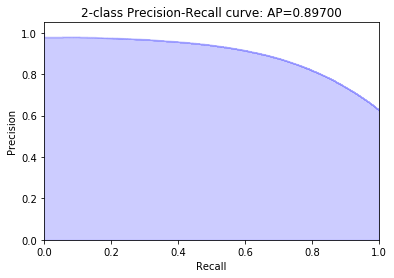

In [17]:
print('Average precision-recall score: {0:0.5f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y_true=y_validation, probas_pred=y_validation_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.5f}'.format(average_precision))

Text(0.5,1,'2-class ROC curve: AP=0.83457')

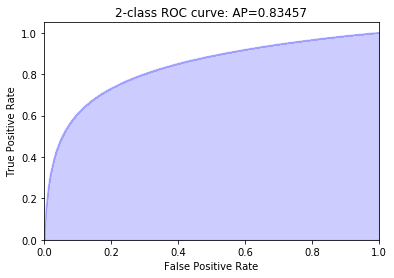

In [18]:
fpr, tpr, _ = roc_curve(y_true=y_validation, y_score=y_validation_pred)
auroc = roc_auc_score(y_true=y_validation, y_score=y_validation_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(fpr, tpr, color='b', alpha=0.2,
         where='post')
plt.fill_between(fpr, tpr, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class ROC curve: AP={0:0.5f}'.format(auroc))

### Test

In [19]:
test_accuracy = model.evaluate(x_test, y_test, batch_size=128)
print('Validation accuracy: {}')
print(test_accuracy)

# model.train_on_batch(x_batch, y_batch)

y_test_pred = model.predict_proba(x=x_test)

average_precision = average_precision_score(y_true=y_test, y_score=y_test_pred)

229281/229281 [==============================] - 3s 11us/step
Validation accuracy: {}
[1.4387813401924339, 0.7479075893761872]


Average precision-recall score: 0.89815


Text(0.5,1,'2-class Precision-Recall curve: AP=0.89815')

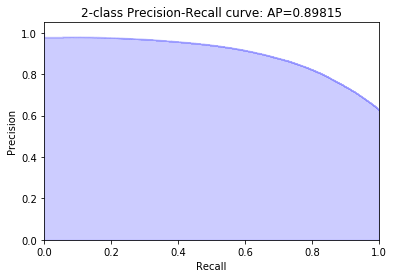

In [20]:
print('Average precision-recall score: {0:0.5f}'.format(
      average_precision))

precision, recall, _ = precision_recall_curve(y_true=y_test, probas_pred=y_test_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.5f}'.format(average_precision))

Text(0.5,1,'2-class ROC curve: AP=0.83583')

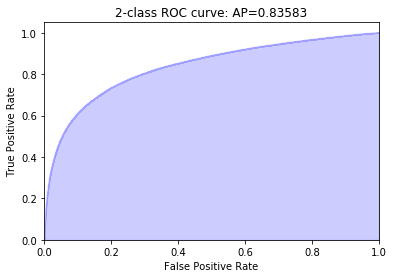

In [21]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=y_test_pred)
auroc = roc_auc_score(y_true=y_test, y_score=y_test_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(fpr, tpr, color='b', alpha=0.2,
         where='post')
plt.fill_between(fpr, tpr, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class ROC curve: AP={0:0.5f}'.format(auroc))

(406, 256)
(256,)
(256, 128)
(128,)
(128, 64)
(64,)
(64, 1)
(1,)
-0.7714272
0.70988184


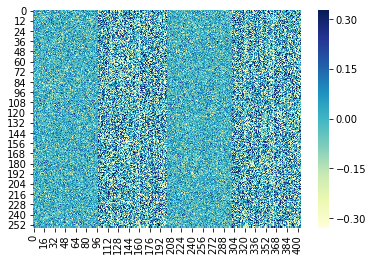

In [22]:
import seaborn as sns
weights = model.get_weights()
for _ in weights:
    print(_.shape)
print(weights[0].min())
print(weights[0].max())

sns.heatmap(weights[0].T, cmap="YlGnBu", robust=True)

In [23]:
print(weights[0][0:d2v_vector_size].var())
print(weights[0][0:d2v_vector_size].mean())
print(weights[0][d2v_vector_size:d2v_vector_size+n2v_dimensions].var())
print(weights[0][d2v_vector_size:d2v_vector_size+n2v_dimensions].mean())

0.0074710087
-0.00028104943
0.034837224
-0.0011471555


In [24]:
print(weights[0][d2v_vector_size:d2v_vector_size+n2v_dimensions].var()/weights[0][0:d2v_vector_size].var())


4.662988
